<a href="https://colab.research.google.com/github/LiterallyRicky/DataScience-A2/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!


---



**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

**Answer1:**

Including more polynomials compared to the one polynomial graphs we've been creating since the second unit, it can make predictions and posterior predictive curve even better! Polynomials are extremely useful when the relationships are more complicated.



---



**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

**Answer2:**

There's a case when if you include and increase the amount of polynomial elements you have in a model, it could potentially show no or any difference on your model. Of course, try it out and see if it works, but if it doesn't fit 'better'  - **STICK WITH THE LINEAR MODEL**, it'll be easier to run rather than having more polynomials.



---



**Task3**:

What's the point of using b splines?

**Answer3:**

B splines are primarily used to fit data better compared to other models. They can be used in settings where we wish to fit a curve to data without making strong functional form assumptions.



---



**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

**Answer4:**

I think a gaussian process is a way to predict unknown values by treating functions like probability distributions. I like to think of it of a process that draws smooth curves through data points in a dataset. It can give you a measure of uncertianity in predictions as well.

---



**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


**Answer5:**






In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install preliz
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-apb0ottp
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-apb0ottp
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=6135e9b3f45b434f1bbe0f842ad29e91ab745cd1d0be81bfb0da6e13179d5813
  Stored in directory: /tmp/pip-ephem-wheel-cache-29f8e9ze/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
   ━

In [2]:
import preliz as pz
import bambi as bmb
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

In [3]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')

#convert from pandas to numpy array
height = howell["height"].values
weight = howell["weight"].values
age = howell["age"].values
male = howell["male"].values

In [4]:
def get_ig_params(x_vals, l_b=None, u_b=None, mass=0.96, plot=False):
    """
    Returns a weakly informative prior for the length-scale parameter of the GP kernel.
    """

    differences = np.abs(np.subtract.outer(x_vals, x_vals))
    if l_b is None:
        l_b = np.min(differences[differences != 0]) * 2
    if u_b is None:
        u_b = np.max(differences) / 1.5

    dist = pz.InverseGamma()
    pz.maxent(dist, l_b, u_b, mass, plot=plot)

    return dict(zip(dist.param_names, dist.params))

In [5]:
prior_gp = {
    "sigma": bmb.Prior("Gamma", mu=1, sigma=0.01),
    "ell": bmb.Prior("InverseGamma", **get_ig_params(height))
}

priors = {
    "hsgp(hour, m=10, c=1.5)": prior_gp,
    "alpha": bmb.Prior("HalfNormal", sigma=1)
}

model_howell = bmb.Model("weight ~ 0 + hsgp(height, m=10, c=1.5)", howell, family="negativebinomial", priors=priors)
idata_howell = model_howell.fit()

Output()

ERROR:pymc.stats.convergence:There were 106 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


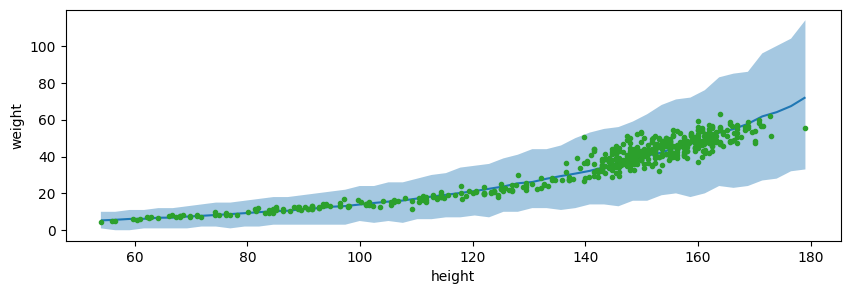

In [6]:
_, ax = bmb.interpret.plot_predictions(model_howell, idata_howell, ["height"],
                                       pps = True,
                                       fig_kwargs={"figsize": (10, 3)})
ax[0].plot(height, weight, "C2.")



---



**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

**Answer6:**

There are certian potentiallity's where the Gaussian process funcionality could be worse such as creating a custom changepoint mean function. Though I don't much, there's a lot of benefits and disadvantages with using/using other Gaussian processes.

**Quoted from article:** "We could encode this mean function directly, but if we wrap it inside of a Mean object, then it easier to use other Gaussian process functionality, like the .conditional and .predict methods."



---



**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

The "heaviside step function" graphs are pretty cool as I've never seen
something like this before. It's interesting how a model investigating into a dataset is using a color bar rather than having a linear line. Naturally, I don't really understand most of what's happening but seeing the description provided before the graph: "we could propose a scaling function s(x) that specifies the region where the base covariance is active," I can infer that with the brighter the color, the more active the base covariance will be. What is a base covariance? That's something I should look into!

Researched: Covariance is essentially a statistical term where it measures the joint variability of two random variables. Conditionally, this makes a linear distribution, which I can tell now that this is the linearity that's being shown in the graph produced in the article. Pretty cool!
